# Motivation:

Vitmain D deficiency is one of the most prevalent yet underappreciated deficiency in adults especially with more people spending time indoors. The project specifically explores the vitD deficiency impact on body mass index, Insulin, heart rate etc

### References
Jonasson TH, Costa TMDRL, Petterle RR, Moreira CA, Borba VZC. Body composition in nonobese individuals according to vitamin D level. PLoS One. 2020 Nov 9;15(11):e0241858. doi: 10.1371/journal.pone.0241858. PMID: 33166333; PMCID: PMC7652291.

Zaidi SA, Singh G, Owojori O, Kela R, Spoors S, Abbas M, Barton F, Rogers C. Vitamin D Deficiency in Medical Inpatients: A Retrospective Study of Implications of Untreated Versus Treated Deficiency. Nutr Metab Insights. 2016 Sep 21;9:65-9. doi: 10.4137/NMI.S33747. PMID: 27688711; PMCID: PMC5033132.

Ashtary-Larky D, Kheirollah A, Bagheri R, Ghaffari MA, Mard SA, Hashemi SJ, Mir I, Wong A. A single injection of vitamin D3 improves insulin sensitivity and β-cell function but not muscle damage or the inflammatory and cardiovascular responses to an acute bout of resistance exercise in vitamin D-deficient resistance-trained males. Br J Nutr. 2020 Feb 28;123(4):394-401. doi: 10.1017/S0007114519002770. Epub 2019 Nov 8. PMID: 31701851.

Golzarand M, Hollis BW, Mirmiran P, Wagner CL, Shab-Bidar S. Vitamin D supplementation and body fat mass: a systematic review and meta-analysis. Eur J Clin Nutr. 2018 Oct;72(10):1345-1357. doi: 10.1038/s41430-018-0132-z. Epub 2018 Mar 21. PMID: 29563638.


In [1]:
import xport
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats as stests
from scipy import stats

In [3]:
file_loc = '../nhanes_data_files/'
df_demog_E = pd.read_sas(file_loc + 'DEMO_E_2007_2008.xpt')
df_demog_F = pd.read_sas(file_loc + 'DEMO_F_2009_2010.xpt')
df_demog_G = pd.read_sas(file_loc + 'DEMO_G_2011_2012.xpt')
df_demog_H = pd.read_sas(file_loc + 'DEMO_H_2013_2014.xpt')
df_demog_I = pd.read_sas(file_loc + 'DEMO_I_2015_2016.xpt')


df_BMX_E = pd.read_sas(file_loc +'BMX_E_2007_2008.xpt')
df_BIOPRO_E = pd.read_sas(file_loc +'BIOPRO_E_2007_2008.xpt')
df_VID_E = pd.read_sas(file_loc +'VID_E_2007_2008.xpt')
df_BPX_E = pd.read_sas(file_loc +'BPX_E_2007_2008.xpt')


df_BMX_F = pd.read_sas(file_loc +'BMX_F_2009_2010.xpt')
df_BIOPRO_F = pd.read_sas(file_loc +'BIOPRO_F_2009_2010.xpt')
df_VID_F = pd.read_sas(file_loc +'VID_F_2009_2010.xpt')
df_BPX_F = pd.read_sas(file_loc +'BPX_F_2009_2010.xpt')

df_BMX_G = pd.read_sas(file_loc +'BMX_G_2011_2012.xpt')
df_BIOPRO_G = pd.read_sas(file_loc +'BIOPRO_G_2011_2012.xpt')
df_VID_G = pd.read_sas(file_loc +'VID_G_2011_2012.xpt')
df_BPX_G = pd.read_sas(file_loc +'BPX_G_2011_2012.xpt')

df_BMX_H = pd.read_sas(file_loc +'BMX_H_2013_2014.xpt')
df_BIOPRO_H = pd.read_sas(file_loc +'BIOPRO_H_2013_2014.xpt')
df_VID_H = pd.read_sas(file_loc +'VID_H_2013_2014.xpt')
df_BPX_H = pd.read_sas(file_loc +'BPX_H_2013_2014.xpt')

df_BMX_I = pd.read_sas(file_loc +'BMX_I_2015_2016.xpt')
df_BIOPRO_I = pd.read_sas(file_loc +'BIOPRO_I_2015_2016.xpt')
df_VID_I = pd.read_sas(file_loc +'VID_I_2015_2016.xpt')
df_BPX_I = pd.read_sas(file_loc +'BPX_I_2015_2016.xpt')

df_I_E = pd.read_sas(file_loc +'GLU_E_2007_2008.xpt')
df_I_F = pd.read_sas(file_loc +'GLU_F_2009_2010.xpt')
df_I_G = pd.read_sas(file_loc +'GLU_G_2011_2012.xpt')
df_I_H = pd.read_sas(file_loc +'INS_H_2013_2014.xpt')
df_I_I = pd.read_sas(file_loc +'INS_I_2015_2016.xpt')

# df_BIOPRO_J = pd.read_sas(file_loc +'BIOPRO_J_2017_2018.xpt')
# df_VID_J = pd.read_sas(file_loc +'VID_J_2017_2018.xpt')

# df_BMX_2017_2018 = pd.read_sas(file_loc +'BMX_J_2017_2018.xpt')

In [4]:
# df_BPX_H.head(3)

In [5]:
dfbmi_E=df_BMX_E[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
dfbmi_F=df_BMX_F[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
dfbmi_G=df_BMX_G[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
dfbmi_H=df_BMX_H[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
dfbmi_I=df_BMX_I[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
dfbmi_I.head(3)

,SEQN,BMXWT,BMXBMI,BMXWAIST
0,83732.0,94.8,27.8,101.1
1,83733.0,90.4,30.8,107.9
2,83734.0,83.4,28.8,116.5


In [6]:
df_ALP_E=df_BIOPRO_E[['SEQN','LBXSAPSI']].copy()
df_ALP_F=df_BIOPRO_F[['SEQN','LBXSAPSI']].copy()
df_ALP_G=df_BIOPRO_G[['SEQN','LBXSAPSI']].copy()
df_ALP_H=df_BIOPRO_H[['SEQN','LBXSAPSI']].copy()
df_ALP_I=df_BIOPRO_I[['SEQN','LBXSAPSI']].copy()
df_ALP_E.head()

,SEQN,LBXSAPSI
0,41475.0,113.0
1,41477.0,44.0
2,41479.0,78.0
3,41481.0,NaN
4,41482.0,85.0


In [7]:
# df_VID_E.head()

In [8]:
df_VID_SALP_E = df_demog_E[['SEQN','RIDAGEYR']].merge(df_VID_E[['SEQN','LBXVIDMS']]).merge(df_ALP_E).merge(dfbmi_E).merge(df_BPX_E[['SEQN','BPXPLS']])
df_VID_SALP_E=df_VID_SALP_E[df_VID_SALP_E['RIDAGEYR']>20].copy()
df_VID_SALP_E['loge_LBXSAPSI']=np.log(df_VID_SALP_E['LBXSAPSI'])

df_VID_SALP_F = df_demog_F[['SEQN','RIDAGEYR']].merge(df_VID_F[['SEQN','LBXVIDMS']]).merge(df_ALP_F).merge(dfbmi_F).merge(df_BPX_F[['SEQN','BPXPLS']])
df_VID_SALP_F=df_VID_SALP_F[df_VID_SALP_F['RIDAGEYR']>20].copy()
df_VID_SALP_F['loge_LBXSAPSI']=np.log(df_VID_SALP_F['LBXSAPSI'])

df_VID_SALP_G = df_demog_G[['SEQN','RIDAGEYR']].merge(df_VID_G[['SEQN','LBXVIDMS']]).merge(df_ALP_G).merge(dfbmi_G).merge(df_BPX_G[['SEQN','BPXPLS']])
df_VID_SALP_G=df_VID_SALP_G[df_VID_SALP_G['RIDAGEYR']>20].copy()
df_VID_SALP_G['loge_LBXSAPSI']=np.log(df_VID_SALP_G['LBXSAPSI'])

df_VID_SALP_H = df_demog_H[['SEQN','RIDAGEYR']].merge(df_VID_H[['SEQN','LBXVIDMS']]).merge(df_ALP_H).merge(dfbmi_H).merge(df_BPX_H[['SEQN','BPXPLS']])
df_VID_SALP_H=df_VID_SALP_H[df_VID_SALP_H['RIDAGEYR']>20].copy()
df_VID_SALP_H['loge_LBXSAPSI']=np.log(df_VID_SALP_H['LBXSAPSI'])

df_VID_SALP_I = df_demog_I[['SEQN','RIDAGEYR']].merge(df_VID_I[['SEQN','LBXVIDMS']]).merge(df_ALP_I).merge(dfbmi_I).merge(df_BPX_I[['SEQN','BPXPLS']])
df_VID_SALP_I=df_VID_SALP_I[df_VID_SALP_I['RIDAGEYR']>20].copy()
df_VID_SALP_I['loge_LBXSAPSI']=np.log(df_VID_SALP_I['LBXSAPSI'])

df_VID_SALP_E.shape,df_VID_SALP_F.shape,df_VID_SALP_G.shape,df_VID_SALP_H.shape,df_VID_SALP_I.shape

((5628, 9), (5947, 9), (5206, 9), (5482, 9), (5395, 9))

In [9]:
df_VID_I_SALP_E = df_demog_E[['SEQN','RIDAGEYR']].merge(df_VID_E[['SEQN','LBXVIDMS']]).merge(dfbmi_E).merge(df_BPX_E[['SEQN','BPXPLS']]).merge(df_ALP_E).merge(df_I_E[['SEQN','LBXIN']])
df_VID_I_SALP_E=df_VID_I_SALP_E[df_VID_I_SALP_E['RIDAGEYR']>20].copy()
df_VID_I_SALP_E['loge_LBXIN']=np.log(df_VID_I_SALP_E['LBXIN'])
df_VID_I_SALP_E['loge_LBXSAPSI']=np.log(df_VID_I_SALP_E['LBXSAPSI'])

df_VID_I_SALP_F = df_demog_F[['SEQN','RIDAGEYR']].merge(df_VID_F[['SEQN','LBXVIDMS']]).merge(dfbmi_F).merge(df_BPX_F[['SEQN','BPXPLS']]).merge(df_ALP_F).merge(df_I_F[['SEQN','LBXIN']])
df_VID_I_SALP_F=df_VID_I_SALP_F[df_VID_I_SALP_F['RIDAGEYR']>20].copy()
df_VID_I_SALP_F['loge_LBXIN']=np.log(df_VID_I_SALP_F['LBXIN'])
df_VID_I_SALP_F['loge_LBXSAPSI']=np.log(df_VID_I_SALP_F['LBXSAPSI'])

df_VID_I_SALP_G = df_demog_G[['SEQN','RIDAGEYR']].merge(df_VID_G[['SEQN','LBXVIDMS']]).merge(dfbmi_G).merge(df_BPX_G[['SEQN','BPXPLS']]).merge(df_ALP_G).merge(df_I_G[['SEQN','LBXIN']])
df_VID_I_SALP_G=df_VID_I_SALP_G[df_VID_I_SALP_G['RIDAGEYR']>20].copy()
df_VID_I_SALP_G['loge_LBXIN']=np.log(df_VID_I_SALP_G['LBXIN'])
df_VID_I_SALP_G['loge_LBXSAPSI']=np.log(df_VID_I_SALP_G['LBXSAPSI'])

df_VID_I_SALP_H = df_demog_H[['SEQN','RIDAGEYR']].merge(df_VID_H[['SEQN','LBXVIDMS']]).merge(dfbmi_H).merge(df_BPX_H[['SEQN','BPXPLS']]).merge(df_ALP_H).merge(df_I_H[['SEQN','LBXIN']])
df_VID_I_SALP_H=df_VID_I_SALP_H[df_VID_I_SALP_H['RIDAGEYR']>20].copy()
df_VID_I_SALP_H['loge_LBXIN']=np.log(df_VID_I_SALP_H['LBXIN'])
df_VID_I_SALP_H['loge_LBXSAPSI']=np.log(df_VID_I_SALP_H['LBXSAPSI'])

df_VID_I_SALP_I = df_demog_I[['SEQN','RIDAGEYR']].merge(df_VID_I[['SEQN','LBXVIDMS']]).merge(dfbmi_I).merge(df_BPX_I[['SEQN','BPXPLS']]).merge(df_ALP_I).merge(df_I_I[['SEQN','LBXIN']])
df_VID_I_SALP_I=df_VID_I_SALP_I[df_VID_I_SALP_I['RIDAGEYR']>20].copy()
df_VID_I_SALP_I['loge_LBXIN']=np.log(df_VID_I_SALP_I['LBXIN'])
df_VID_I_SALP_I['loge_LBXSAPSI']=np.log(df_VID_I_SALP_I['LBXSAPSI'])

df_VID_I_SALP_E.shape,df_VID_I_SALP_F.shape,df_VID_I_SALP_G.shape,df_VID_I_SALP_H.shape,df_VID_I_SALP_I.shape

((2742, 11), (2878, 11), (2573, 11), (2623, 11), (2563, 11))

In [10]:
df_VID_I_SALP_E[['RIDAGEYR','LBXVIDMS','BMXWT','BMXBMI','BMXWAIST','BPXPLS','LBXIN','loge_LBXIN','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,RIDAGEYR,LBXVIDMS,BMXWT,BMXBMI,BMXWAIST,BPXPLS,LBXIN,loge_LBXIN,LBXSAPSI,loge_LBXSAPSI
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,51.402992,61.385714,80.786728,28.722177,98.954344,71.696911,12.959778,2.291300,70.255792,4.205888
std,17.461920,24.477860,19.707146,6.199049,15.174050,11.854291,11.192028,0.734144,22.630921,0.301611
min,21.000000,7.570000,32.400000,15.250000,59.100000,42.000000,1.000000,0.000000,24.000000,3.178054
25%,36.000000,43.400000,66.775000,24.360000,88.700000,64.000000,6.120000,1.811562,55.000000,4.007333
50%,51.000000,60.500000,78.450000,27.840000,98.200000,70.000000,9.655000,2.267476,67.000000,4.204693
75%,66.000000,76.300000,92.100000,32.017500,107.925000,78.000000,16.110000,2.779440,81.000000,4.394449
max,80.000000,213.000000,169.000000,64.800000,158.200000,122.000000,129.950000,4.867150,282.000000,5.641907


In [11]:
((2742, 11), (2878, 10), (2573, 10), (2623, 10), (2563, 10))

((2742, 11), (2878, 10), (2573, 10), (2623, 10), (2563, 10))

In [12]:
df_VID_I_SALP_E[['RIDAGEYR','LBXVIDMS','BMXWT','BMXBMI','BMXWAIST','BPXPLS','LBXIN','loge_LBXIN','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,RIDAGEYR,LBXVIDMS,BMXWT,BMXBMI,BMXWAIST,BPXPLS,LBXIN,loge_LBXIN,LBXSAPSI,loge_LBXSAPSI
RIDAGEYR,1.000000,0.081373,-0.084247,-0.004447,0.171777,-0.084048,0.013918,0.026150,0.148894,0.152569
LBXVIDMS,0.081373,1.000000,-0.167080,-0.238163,-0.168512,-0.077702,-0.148980,-0.174989,-0.108467,-0.113877
BMXWT,-0.084247,-0.167080,1.000000,0.857812,0.879720,0.058745,0.409647,0.467976,0.025525,0.047899
BMXBMI,-0.004447,-0.238163,0.857812,1.000000,0.882153,0.109515,0.471827,0.549222,0.089483,0.110015
BMXWAIST,0.171777,-0.168512,0.879720,0.882153,1.000000,0.098186,0.458944,0.543257,0.109331,0.134382
BPXPLS,-0.084048,-0.077702,0.058745,0.109515,0.098186,1.000000,0.172427,0.171583,0.081388,0.072941
LBXIN,0.013918,-0.148980,0.409647,0.471827,0.458944,0.172427,1.000000,0.860132,0.046177,0.056277
loge_LBXIN,0.026150,-0.174989,0.467976,0.549222,0.543257,0.171583,0.860132,1.000000,0.074182,0.090302
LBXSAPSI,0.148894,-0.108467,0.025525,0.089483,0.109331,0.081388,0.046177,0.074182,1.000000,0.964065
loge_LBXSAPSI,0.152569,-0.113877,0.047899,0.110015,0.134382,0.072941,0.056277,0.090302,0.964065,1.000000


In [13]:
df_VID_SALP_E[['RIDAGEYR','LBXVIDMS','LBXSAPSI','BMXWT','BMXBMI','BMXWAIST','BPXPLS','loge_LBXSAPSI']].dropna().describe()

,RIDAGEYR,LBXVIDMS,LBXSAPSI,BMXWT,BMXBMI,BMXWAIST,BPXPLS,loge_LBXSAPSI
count,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000
mean,51.251470,61.899007,70.281816,81.364785,29.016991,99.509174,73.115032,4.203575
std,17.529445,24.915065,24.641956,20.527909,6.477529,15.790698,12.238750,0.307496
min,21.000000,6.310000,15.000000,32.400000,14.200000,59.100000,42.000000,2.708050
25%,37.000000,43.600000,55.000000,67.100000,24.510000,88.500000,64.000000,4.007333
50%,51.000000,60.800000,67.000000,78.600000,28.120000,98.500000,72.000000,4.204693
75%,66.000000,77.100000,81.000000,92.600000,32.255000,108.900000,80.000000,4.394449
max,80.000000,213.000000,626.000000,218.200000,71.830000,178.200000,142.000000,6.439350


In [14]:
df_VID_SALP_E[['RIDAGEYR','LBXVIDMS','LBXSAPSI','BMXWT','BMXBMI','BMXWAIST','BPXPLS','loge_LBXSAPSI']].dropna().corr()

,RIDAGEYR,LBXVIDMS,LBXSAPSI,BMXWT,BMXBMI,BMXWAIST,BPXPLS,loge_LBXSAPSI
RIDAGEYR,1.000000,0.086216,0.133098,-0.055042,0.008324,0.175858,-0.124272,0.134123
LBXVIDMS,0.086216,1.000000,-0.116274,-0.161752,-0.227262,-0.163572,-0.070484,-0.125933
LBXSAPSI,0.133098,-0.116274,1.000000,0.048901,0.112808,0.129947,0.084468,0.932526
BMXWT,-0.055042,-0.161752,0.048901,1.000000,0.870725,0.887878,0.108036,0.067185
BMXBMI,0.008324,-0.227262,0.112808,0.870725,1.000000,0.886201,0.158981,0.134127
BMXWAIST,0.175858,-0.163572,0.129947,0.887878,0.886201,1.000000,0.129325,0.156947
BPXPLS,-0.124272,-0.070484,0.084468,0.108036,0.158981,0.129325,1.000000,0.087657
loge_LBXSAPSI,0.134123,-0.125933,0.932526,0.067185,0.134127,0.156947,0.087657,1.000000


In [15]:
df_VID_SALP=pd.concat([df_VID_SALP_E,df_VID_SALP_F,df_VID_SALP_G,df_VID_SALP_H,df_VID_SALP_I])
df_VID_SALP.dropna().describe()

,SEQN,RIDAGEYR,LBXVIDMS,LBXSAPSI,BMXWT,BMXBMI,BMXWAIST,BPXPLS,loge_LBXSAPSI
count,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000
mean,67836.262211,49.693745,64.347087,68.633633,81.578865,29.127405,99.520381,72.574379,4.179450
std,15140.833015,17.236860,27.311142,24.438187,21.064141,6.743016,16.189153,11.936906,0.308262
min,41475.000000,21.000000,6.310000,7.000000,29.100000,13.180000,55.500000,36.000000,1.945910
25%,54858.750000,35.000000,44.800000,53.000000,66.800000,24.400000,88.000000,64.000000,3.970292
50%,67236.500000,49.000000,61.700000,65.000000,78.600000,28.080000,98.150000,72.000000,4.174387
75%,81291.250000,63.000000,79.700000,79.000000,92.800000,32.500000,109.000000,80.000000,4.369448
max,93702.000000,80.000000,375.000000,907.000000,218.200000,84.870000,178.200000,172.000000,6.810142


In [16]:
df_VID_SALP[['LBXVIDMS','BMXWT','BMXBMI','BMXWAIST','BPXPLS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,BMXWT,BMXBMI,BMXWAIST,BPXPLS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.155335,-0.168543,-0.119829,-0.074130,-0.085821,-0.095983
BMXWT,-0.155335,1.000000,0.874940,0.892716,0.102215,0.076558,0.097559
BMXBMI,-0.168543,0.874940,1.000000,0.903030,0.139243,0.130851,0.155874
BMXWAIST,-0.119829,0.892716,0.903030,1.000000,0.128991,0.154693,0.181955
BPXPLS,-0.074130,0.102215,0.139243,0.128991,1.000000,0.099303,0.102872
LBXSAPSI,-0.085821,0.076558,0.130851,0.154693,0.099303,1.000000,0.925371
loge_LBXSAPSI,-0.095983,0.097559,0.155874,0.181955,0.102872,0.925371,1.000000


In [17]:
df_VID_SALP_I[['LBXVIDMS','LBXSAPSI','BMXWT','BMXBMI','BMXWAIST','BPXPLS','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,BMXWT,BMXBMI,BMXWAIST,BPXPLS,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.085314,-0.151914,-0.154288,-0.096105,-0.087466,-0.081785
LBXSAPSI,-0.085314,1.000000,0.103405,0.160005,0.185125,0.092639,0.957997
BMXWT,-0.151914,0.103405,1.000000,0.877911,0.894218,0.120471,0.118452
BMXBMI,-0.154288,0.160005,0.877911,1.000000,0.909067,0.140174,0.177167
BMXWAIST,-0.096105,0.185125,0.894218,0.909067,1.000000,0.142901,0.204203
BPXPLS,-0.087466,0.092639,0.120471,0.140174,0.142901,1.000000,0.092140
loge_LBXSAPSI,-0.081785,0.957997,0.118452,0.177167,0.204203,0.092140,1.000000


In [18]:
df_VID_I_SALP=pd.concat([df_VID_I_SALP_E,df_VID_I_SALP_F,df_VID_I_SALP_G,df_VID_I_SALP_H,df_VID_I_SALP_I])
df_VID_I_SALP.dropna().describe()

,SEQN,RIDAGEYR,LBXVIDMS,BMXWT,BMXBMI,BMXWAIST,BPXPLS,LBXSAPSI,LBXIN,loge_LBXIN,loge_LBXSAPSI
count,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000
mean,67652.886946,50.108325,64.546077,81.343366,29.006735,99.352530,71.548675,68.438119,13.790487,2.324039,4.176810
std,15097.283402,17.236718,27.276725,20.993255,6.691503,16.067825,11.653304,23.653661,17.027071,0.738984,0.309021
min,41479.000000,21.000000,7.570000,29.100000,13.400000,56.200000,36.000000,7.000000,0.140000,-1.966113,1.945910
25%,54835.000000,36.000000,45.100000,66.500000,24.300000,88.200000,64.000000,53.000000,6.300000,1.840550,3.970292
50%,66893.000000,50.000000,61.800000,78.400000,27.950000,98.000000,70.000000,65.000000,10.010000,2.303585,4.174387
75%,81100.500000,64.000000,79.750000,92.600000,32.400000,108.600000,78.000000,79.000000,16.290000,2.790551,4.369448
max,93695.000000,80.000000,375.000000,198.900000,84.870000,176.000000,140.000000,729.000000,682.480000,6.525733,6.591674


In [19]:
df_VID_I_SALP[['RIDAGEYR','LBXVIDMS','BMXWT','BMXBMI','BMXWAIST','BPXPLS','LBXIN','loge_LBXIN','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,RIDAGEYR,LBXVIDMS,BMXWT,BMXBMI,BMXWAIST,BPXPLS,LBXIN,loge_LBXIN,LBXSAPSI,loge_LBXSAPSI
RIDAGEYR,1.000000,0.228770,-0.046956,0.024627,0.176848,-0.133006,0.020301,0.030497,0.133162,0.141847
LBXVIDMS,0.228770,1.000000,-0.162121,-0.169276,-0.123770,-0.060350,-0.089162,-0.138106,-0.088785,-0.094512
BMXWT,-0.046956,-0.162121,1.000000,0.875483,0.892205,0.077466,0.347054,0.498555,0.068567,0.087058
BMXBMI,0.024627,-0.169276,0.875483,1.000000,0.902650,0.114890,0.365001,0.551776,0.120042,0.142090
BMXWAIST,0.176848,-0.123770,0.892205,0.902650,1.000000,0.104615,0.373766,0.564721,0.146803,0.169992
BPXPLS,-0.133006,-0.060350,0.077466,0.114890,0.104615,1.000000,0.133210,0.183077,0.099692,0.097637
LBXIN,0.020301,-0.089162,0.347054,0.365001,0.373766,0.133210,1.000000,0.709573,0.079732,0.090963
loge_LBXIN,0.030497,-0.138106,0.498555,0.551776,0.564721,0.183077,0.709573,1.000000,0.114188,0.138298
LBXSAPSI,0.133162,-0.088785,0.068567,0.120042,0.146803,0.099692,0.079732,0.114188,1.000000,0.940341
loge_LBXSAPSI,0.141847,-0.094512,0.087058,0.142090,0.169992,0.097637,0.090963,0.138298,0.940341,1.000000


array([[<AxesSubplot:title={'center':'LBXVIDMS'}>]], dtype=object)

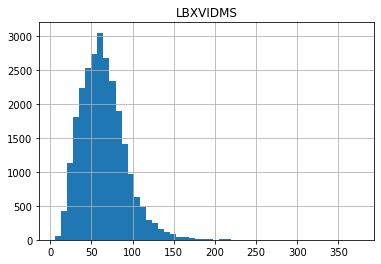

In [20]:
df_VID_SALP[['LBXVIDMS']].hist(bins=50)

<AxesSubplot:>

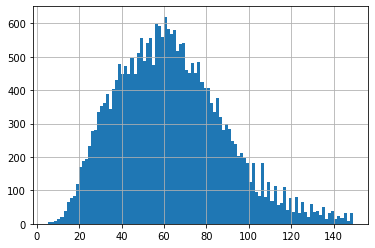

In [21]:
df_VID_SALP[df_VID_SALP['LBXVIDMS']<150]['LBXVIDMS'].hist(bins=100)

array([[<AxesSubplot:title={'center':'LBXSAPSI'}>]], dtype=object)

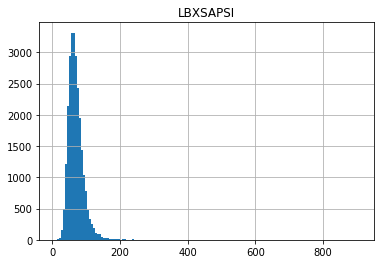

In [22]:
df_VID_SALP[['LBXSAPSI']].hist(bins=150)

<AxesSubplot:>

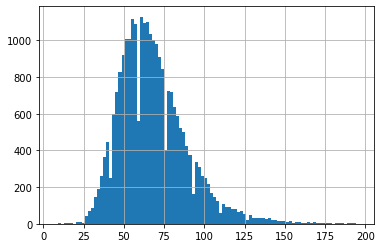

In [23]:
df_VID_SALP[df_VID_SALP['LBXSAPSI']<200]['LBXSAPSI'].hist(bins=100)

array([[<AxesSubplot:title={'center':'loge_LBXSAPSI'}>]], dtype=object)

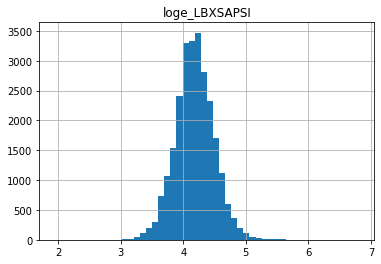

In [24]:
df_VID_SALP[['loge_LBXSAPSI']].hist(bins=50)

In [25]:
# df_merge_paq_dbq[['LBXVIDMS','LBXSAPSI']].groupby(df_merge_paq_dbq['LBXVIDMS']).mean().plot(marker='*',x='DBQ700',y='DXDTRPF')

<AxesSubplot:xlabel='LBXVIDMS'>

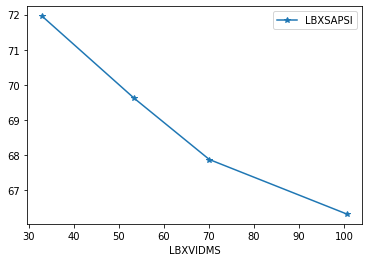

In [26]:
df_VID_SALP[['LBXVIDMS','LBXSAPSI']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='LBXSAPSI')

<AxesSubplot:xlabel='LBXVIDMS'>

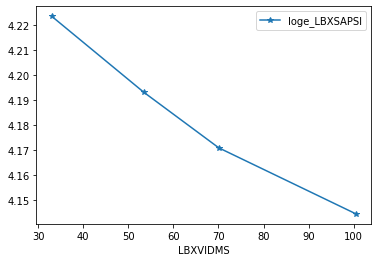

In [27]:
df_VID_SALP[['LBXVIDMS','loge_LBXSAPSI']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='loge_LBXSAPSI')

<AxesSubplot:xlabel='LBXVIDMS'>

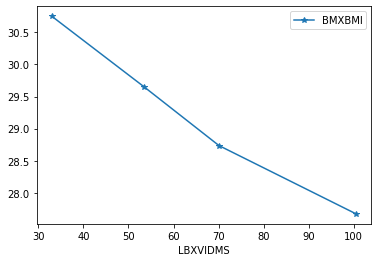

In [28]:
df_VID_SALP[['LBXVIDMS','BMXBMI']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='BMXBMI')

<AxesSubplot:xlabel='LBXVIDMS'>

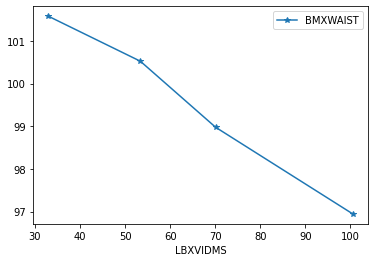

In [29]:
df_VID_SALP[['LBXVIDMS','BMXWAIST']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='BMXWAIST')

<AxesSubplot:xlabel='LBXVIDMS'>

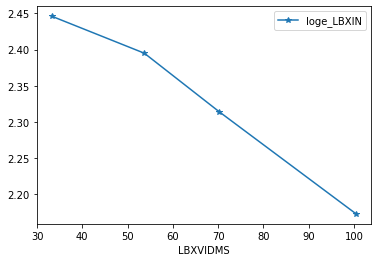

In [30]:
df_VID_I_SALP[['LBXVIDMS','loge_LBXIN']].groupby(pd.cut(df_VID_I_SALP['LBXVIDMS'], [df_VID_I_SALP['LBXVIDMS'].min(),df_VID_I_SALP['LBXVIDMS'].describe()['25%'], df_VID_I_SALP['LBXVIDMS'].describe()['50%'],df_VID_I_SALP['LBXVIDMS'].describe()['75%'],df_VID_I_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='loge_LBXIN')

<AxesSubplot:xlabel='LBXVIDMS'>

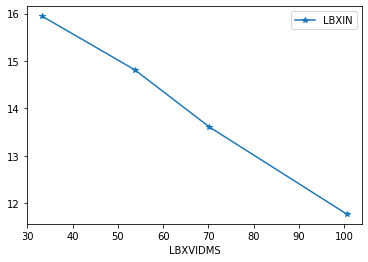

In [31]:
df_VID_I_SALP[['LBXVIDMS','LBXIN']].groupby(pd.cut(df_VID_I_SALP['LBXVIDMS'], [df_VID_I_SALP['LBXVIDMS'].min(),df_VID_I_SALP['LBXVIDMS'].describe()['25%'], df_VID_I_SALP['LBXVIDMS'].describe()['50%'],df_VID_I_SALP['LBXVIDMS'].describe()['75%'],df_VID_I_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='LBXIN')

<AxesSubplot:xlabel='LBXVIDMS'>

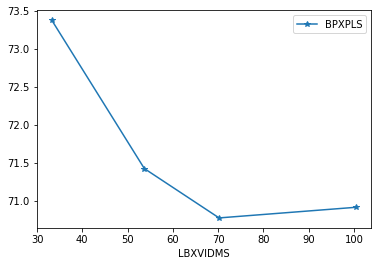

In [32]:
df_VID_I_SALP[['LBXVIDMS','BPXPLS']].groupby(pd.cut(df_VID_I_SALP['LBXVIDMS'], [df_VID_I_SALP['LBXVIDMS'].min(),df_VID_I_SALP['LBXVIDMS'].describe()['25%'], df_VID_I_SALP['LBXVIDMS'].describe()['50%'],df_VID_I_SALP['LBXVIDMS'].describe()['75%'],df_VID_I_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='BPXPLS')

<AxesSubplot:xlabel='loge_LBXIN'>

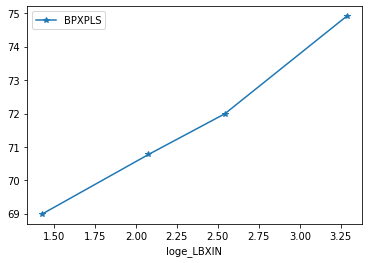

In [33]:
df_VID_I_SALP[['loge_LBXIN','BPXPLS']].groupby(pd.cut(df_VID_I_SALP['loge_LBXIN'], [df_VID_I_SALP['loge_LBXIN'].min(),df_VID_I_SALP['loge_LBXIN'].describe()['25%'], df_VID_I_SALP['loge_LBXIN'].describe()['50%'],df_VID_I_SALP['loge_LBXIN'].describe()['75%'],df_VID_I_SALP['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BPXPLS')

In [34]:
model = smf.ols(formula="loge_LBXIN ~ LBXVIDMS", data=df_VID_I_SALP).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             loge_LBXIN   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.22e-51
Time:                        16:49:28   Log-Likelihood:                -13537.
No. Observations:               12092   AIC:                         2.708e+04
Df Residuals:                   12090   BIC:                         2.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5720      0.017    149.490      0.0

In [35]:
model = smf.ols(formula="BPXPLS ~ loge_LBXIN", data=df_VID_I_SALP).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 BPXPLS   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     423.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.83e-92
Time:                        16:49:29   Log-Likelihood:                -46341.
No. Observations:               11983   AIC:                         9.269e+04
Df Residuals:                   11981   BIC:                         9.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.8721      0.346    187.400      0.0

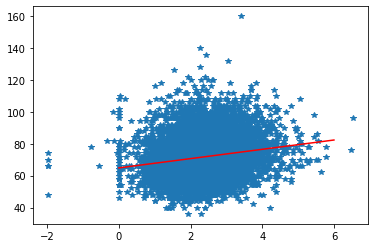

In [36]:
x=[i for i in range(0,7)]

y=[model.params[0]+i*model.params[1] for i in x]

plt.plot(df_VID_I_SALP['loge_LBXIN'],df_VID_I_SALP['BPXPLS'],'*')
plt.plot(x,y,'r')

# Inference:
Vit D statistically small but significant relationship with body mass index and various risk factors that affect BMI. Hence correcting Vit D deficiency is critcial to improve overall health of the individual.